In [8]:
!pip install pymssql sqlalchemy
!pip install "sqlalchemy<2.0"


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 64.9 MB/s eta 0:00:00:00:010:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 86.5 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 35.0 MB/s eta 0:00:0000:01
  Attempting uninstall: sqlalchemy
    Found existing installation: SQLAlchemy 2.0.40
    Uninstalling SQLAlchemy-2.0.40:
      Successfully uninstalled SQLAlchemy-2.0.40


In [11]:
from sqlalchemy import create_engine
import pandas as pd

# Connection details
server = 'cs5165-server.database.windows.net'
database = 'cs5165-database'
username = 'prestonisawesome'
password = 'Password123!'

# Use pymssql via SQLAlchemy
conn_str = f"mssql+pymssql://{username}:{password}@{server}:1433/{database}"
engine = create_engine(conn_str)

# Load tables
features_df = pd.read_sql_query("SELECT * FROM dbo.churn_features", engine)
labels_df = pd.read_sql_query("SELECT HSHD_NUM, churned FROM dbo.churn_labels", engine)

# Merge
df = features_df.merge(labels_df, on="HSHD_NUM")
df.head()


,HSHD_NUM,total_visits,total_transactions,total_spend,avg_units_per_txn,last_purchase,first_purchase,unique_products,AGE_RANGE,MARITAL,INCOME_RANGE,HOMEOWNER,HH_SIZE,CHILDREN,churned
0,10,148,1419,8328.26,11,2020-05-12,2018-08-19,646,45-54 ...,Single,35-49K ...,Homeowner,1 ...,null,0
1,29,2,6,19.95,3,2019-10-19,2019-03-10,6,55-64 ...,Married,100-150K ...,Homeowner,3 ...,1,1
2,53,152,1782,5317.14,17,2020-05-13,2018-08-20,722,55-64 ...,Married,50-74K ...,Homeowner,3 ...,1,0
3,54,237,2023,7266.36,14,2020-05-12,2018-08-20,998,75+ ...,Married,UNDER 35K ...,Homeowner,2 ...,null,0
4,60,518,7574,26982.27,19,2020-05-16,2018-08-19,2052,45-54 ...,Married,35-49K ...,Homeowner,5+ ...,3+,0


In [12]:
# Check basic info about the dataset
df.info()

# Check for nulls
df.isnull().sum()

# Summary stats
df.describe()

# See the distribution of churned households
df['churned'].value_counts()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 396 entries, 0 to 395
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   HSHD_NUM            396 non-null    int64  
 1   total_visits        396 non-null    int64  
 2   total_transactions  396 non-null    int64  
 3   total_spend         396 non-null    float64
 4   avg_units_per_txn   396 non-null    int64  
 5   last_purchase       396 non-null    object 
 6   first_purchase      396 non-null    object 
 7   unique_products     396 non-null    int64  
 8   AGE_RANGE           396 non-null    object 
 9   MARITAL             396 non-null    object 
 10  INCOME_RANGE        396 non-null    object 
 11  HOMEOWNER           396 non-null    object 
 12  HH_SIZE             396 non-null    object 
 13  CHILDREN            396 non-null    object 
 14  churned             396 non-null    int64  
dtypes: float64(1), int64(6), object(8)
memory usage: 49.5+ KB

0    332
1     64
Name: churned, dtype: int64

In [13]:
# convert data to datetime format
df['last_purchase'] = pd.to_datetime(df['last_purchase'])
df['first_purchase'] = pd.to_datetime(df['first_purchase'])

In [14]:
import numpy as np

# Standardize everything: lowercase and strip
df['AGE_RANGE'] = df['AGE_RANGE'].astype(str).str.strip().str.lower()

# Replace both real and string nulls with 'unknown'
df['AGE_RANGE'] = df['AGE_RANGE'].replace(['nan', 'none', 'null'], 'unknown')


In [15]:
df.filter(like='AGE_').head()

,AGE_RANGE
0,45-54
1,55-64
2,55-64
3,75+
4,45-54


In [16]:
df = pd.get_dummies(df, columns=['AGE_RANGE'], prefix='AGE', drop_first=True)

In [17]:
df.head()


,HSHD_NUM,total_visits,total_transactions,total_spend,avg_units_per_txn,last_purchase,first_purchase,unique_products,MARITAL,INCOME_RANGE,...,HH_SIZE,CHILDREN,churned,AGE_25-34,AGE_35-44,AGE_45-54,AGE_55-64,AGE_65-74,AGE_75+,AGE_unknown
0,10,148,1419,8328.26,11,2020-05-12,2018-08-19,646,Single,35-49K ...,...,1 ...,null,0,0,0,1,0,0,0,0
1,29,2,6,19.95,3,2019-10-19,2019-03-10,6,Married,100-150K ...,...,3 ...,1,1,0,0,0,1,0,0,0
2,53,152,1782,5317.14,17,2020-05-13,2018-08-20,722,Married,50-74K ...,...,3 ...,1,0,0,0,0,1,0,0,0
3,54,237,2023,7266.36,14,2020-05-12,2018-08-20,998,Married,UNDER 35K ...,...,2 ...,null,0,0,0,0,0,0,1,0
4,60,518,7574,26982.27,19,2020-05-16,2018-08-19,2052,Married,35-49K ...,...,5+ ...,3+,0,0,0,1,0,0,0,0


In [18]:
# Clean and standardize
df['MARITAL'] = df['MARITAL'].astype(str).str.strip().str.lower()
df['MARITAL'] = df['MARITAL'].replace(['nan', 'null', 'none'], 'unknown')

# One-hot encode
df = pd.get_dummies(df, columns=['MARITAL'], prefix='MARITAL', drop_first=True)

# Verify
df.filter(like='MARITAL_').head()


,MARITAL_single,MARITAL_unknown
0,1,0
1,0,0
2,0,0
3,0,0
4,0,0


In [19]:
# Clean up formatting
df['INCOME_RANGE'] = df['INCOME_RANGE'].astype(str).str.strip().str.upper()

# Replace string nulls with 'UNKNOWN'
df['INCOME_RANGE'] = df['INCOME_RANGE'].replace(['NAN', 'NULL', 'NONE'], 'UNKNOWN')

# Define ordinal mapping
income_map = {
    'UNDER 35K': 0,
    '35-49K': 1,
    '50-74K': 2,
    '75-99K': 3,
    '100-150K': 4,
    '150K+': 5,
    'UNKNOWN': -1  # optional: treat unknowns separately
}

# Apply the mapping
df['INCOME_RANGE_ENCODED'] = df['INCOME_RANGE'].map(income_map)


In [20]:
df[['INCOME_RANGE', 'INCOME_RANGE_ENCODED']].head(10)


,INCOME_RANGE,INCOME_RANGE_ENCODED
0,35-49K,1
1,100-150K,4
2,50-74K,2
3,UNDER 35K,0
4,35-49K,1
5,50-74K,2
6,75-99K,3
7,75-99K,3
8,35-49K,1
9,150K+,5


In [21]:
# Normalize
df['HOMEOWNER'] = df['HOMEOWNER'].astype(str).str.strip().str.lower()

# Replace nulls and weird strings
df['HOMEOWNER'] = df['HOMEOWNER'].replace(['nan', 'null', 'none'], 'unknown')

# Binary encode: 1 for homeowner, 0 for non-homeowners or unknown
df['IS_HOMEOWNER'] = df['HOMEOWNER'].apply(lambda x: 1 if x == 'homeowner' else 0)
df[['HOMEOWNER', 'IS_HOMEOWNER']].head(30)


,HOMEOWNER,IS_HOMEOWNER
0,homeowner,1
1,homeowner,1
2,homeowner,1
3,homeowner,1
4,homeowner,1
5,homeowner,1
6,homeowner,1
7,homeowner,1
8,homeowner,1
9,homeowner,1


In [22]:
import numpy as np

# Standardize and clean
df['HH_SIZE'] = df['HH_SIZE'].astype(str).str.strip().str.upper()
df['HH_SIZE'] = df['HH_SIZE'].replace({'5+': 5, 'NULL': np.nan, 'NAN': np.nan, 'NONE': np.nan})

# Convert to numeric
df['HH_SIZE'] = pd.to_numeric(df['HH_SIZE'])

# Impute missing values with median (safe for small dataset)
df['HH_SIZE'] = df['HH_SIZE'].fillna(df['HH_SIZE'].median())


In [23]:
df['HH_SIZE'].describe()

count    396.000000
mean       2.378788
std        1.189811
min        1.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        5.000000
Name: HH_SIZE, dtype: float64

In [24]:
# Normalize strings
df['CHILDREN'] = df['CHILDREN'].astype(str).str.strip().str.upper()

# Replace '3+' with 3 (or 4 if you want to emphasize "many")
df['CHILDREN'] = df['CHILDREN'].replace({'3+': 3, 'NULL': np.nan, 'NAN': np.nan, 'NONE': np.nan})

# Convert to numeric
df['CHILDREN'] = pd.to_numeric(df['CHILDREN'])

# Fill missing with median
df['CHILDREN'] = df['CHILDREN'].fillna(df['CHILDREN'].median())
df.head(30)

,HSHD_NUM,total_visits,total_transactions,total_spend,avg_units_per_txn,last_purchase,first_purchase,unique_products,INCOME_RANGE,HOMEOWNER,...,AGE_35-44,AGE_45-54,AGE_55-64,AGE_65-74,AGE_75+,AGE_unknown,MARITAL_single,MARITAL_unknown,INCOME_RANGE_ENCODED,IS_HOMEOWNER
0,10,148,1419,8328.26,11,2020-05-12,2018-08-19,646,35-49K,homeowner,...,0,1,0,0,0,0,1,0,1,1
1,29,2,6,19.95,3,2019-10-19,2019-03-10,6,100-150K,homeowner,...,0,0,1,0,0,0,0,0,4,1
2,53,152,1782,5317.14,17,2020-05-13,2018-08-20,722,50-74K,homeowner,...,0,0,1,0,0,0,0,0,2,1
3,54,237,2023,7266.36,14,2020-05-12,2018-08-20,998,UNDER 35K,homeowner,...,0,0,0,0,1,0,0,0,0,1
4,60,518,7574,26982.27,19,2020-05-16,2018-08-19,2052,35-49K,homeowner,...,0,1,0,0,0,0,0,0,1,1
5,81,7,9,39.82,1,2020-05-04,2019-04-22,9,50-74K,homeowner,...,0,0,1,0,0,0,0,0,2,1
6,92,2,8,29.07,7,2019-03-27,2018-10-30,7,75-99K,homeowner,...,0,0,1,0,0,0,0,0,3,1
7,99,204,3665,13586.72,24,2020-05-09,2018-08-17,1120,75-99K,homeowner,...,1,0,0,0,0,0,0,0,3,1
8,115,2,37,100.26,20,2019-08-08,2019-08-06,36,35-49K,homeowner,...,1,0,0,0,0,0,0,0,1,1
9,117,236,3414,17226.99,18,2020-05-12,2018-08-17,1718,150K+,homeowner,...,0,1,0,0,0,0,1,0,5,1


In [25]:
df['CHILDREN'].describe()


count    396.000000
mean       1.295455
std        0.656866
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        3.000000
Name: CHILDREN, dtype: float64

In [26]:
X = df.drop(columns=[
    'HSHD_NUM',
    'INCOME_RANGE',    # string version
    'HOMEOWNER',       # string version
    'last_purchase',   # dates not needed for now
    'first_purchase',  # same here
    'churned'          # this is our target
])
y = df['churned']


# 🧼 Churn Model Data Cleaning Documentation

This markdown file documents the cleaning and encoding steps taken for each column in the churn prediction dataset.

---

## Columns We Preprocessed

### 1. `AGE_RANGE`
- **Issue**: Stored as strings (e.g., '25-34', '45-54'), including some nulls.
- **Action**:
  - Converted all entries to lowercase strings.
  - Replaced `'null'`, `'nan'`, etc., with `'unknown'`.
  - One-hot encoded into dummy variables (`AGE_35-44`, `AGE_45-54`, etc.), dropping the first to avoid multicollinearity.

### 2. `MARITAL`
- **Issue**: Categorical string values like `'Married'`, `'Single'`, and `'null'`.
- **Action**:
  - Cleaned and standardized strings.
  - Replaced invalid/missing values with `'unknown'`.
  - One-hot encoded (`MARITAL_single`, `MARITAL_unknown`), dropping `married` as baseline.

### 3. `INCOME_RANGE`
- **Issue**: Ordinal categories stored as strings, including `'null'`.
- **Action**:
  - Standardized strings and replaced nulls with `'UNKNOWN'`.
  - Ordinal-encoded with custom mapping:
    ```
    {
        'UNDER 35K': 0,
        '35-49K': 1,
        '50-74K': 2,
        '75-99K': 3,
        '100-150K': 4,
        '150K+': 5,
        'UNKNOWN': -1
    }
    ```
  - Saved as `INCOME_RANGE_ENCODED`

### 4. `HOMEOWNER`
- **Issue**: Binary categorical string (e.g., `'homeowner'`, `'renter'`, `'null'`)
- **Action**:
  - Normalized strings and replaced nulls with `'unknown'`
  - Created `IS_HOMEOWNER`: 1 if homeowner, 0 otherwise

### 5. `HH_SIZE`
- **Issue**: String values like `'1'`, `'2'`, `'5+'`, and `'null'`
- **Action**:
  - Replaced `'5+'` with 5, `'null'` with `NaN`
  - Converted to numeric and filled missing values with the median

### 6. `CHILDREN`
- **Issue**: String values like `'0'`, `'1'`, `'3+'`, and `'null'`
- **Action**:
  - Replaced `'3+'` with 3, `'null'` with `NaN`
  - Converted to numeric and filled missing with median

---

## Notes
- All non-numeric, non-engineered columns like `INCOME_RANGE`, `HOMEOWNER`, `AGE_RANGE`, and `MARITAL` were dropped before modeling.
- The final dataset includes both original numeric features and engineered ones (like `IS_HOMEOWNER`, `INCOME_RANGE_ENCODED`, and dummy variables for categorical features).

This cleaning process ensures compatibility with machine learning models, improves feature quality, and preserves meaningful signals across all household records.


In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Initialize model
model = RandomForestClassifier(random_state=42)

# Train it
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[96  4]
 [ 2 17]]
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       100
           1       0.81      0.89      0.85        19

    accuracy                           0.95       119
   macro avg       0.89      0.93      0.91       119
weighted avg       0.95      0.95      0.95       119



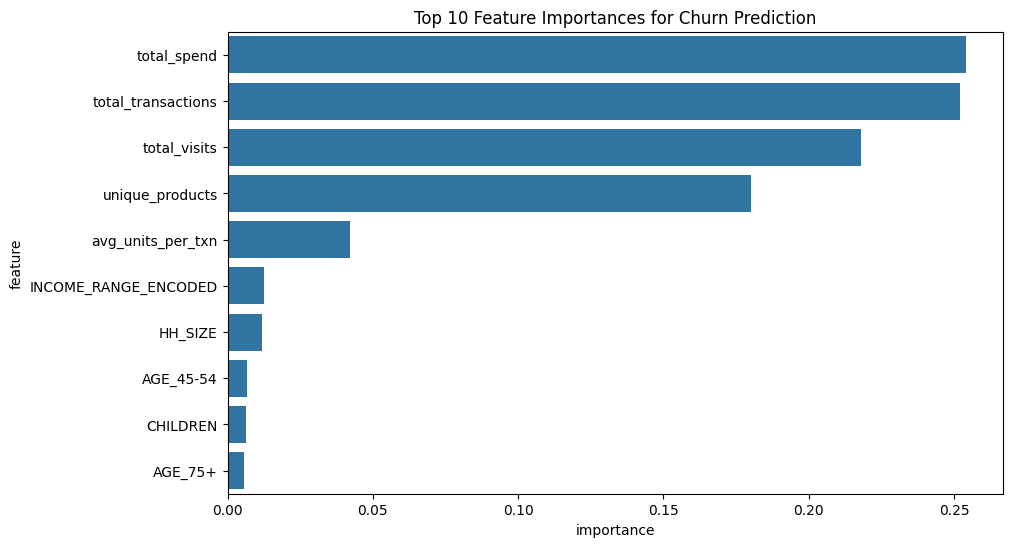

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances
importances = model.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
importance_df = importance_df.sort_values(by='importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df.head(10), x='importance', y='feature')
plt.title('Top 10 Feature Importances for Churn Prediction')
plt.show()


In [30]:
df.to_sql(
    name='churn_model_data',
    con=engine,
    if_exists='replace',
    index=False
)


396

In [32]:
# Example for Churn DataFrame
df.to_json('churn_data.json', orient='records', lines=False)
